# 2019年8、9月份，上海静安和杭州西湖均价下跌分析

分析之后结论是，区域总成交量较少，而区域内不同小区价格差别较大，高价小区成交变少，低价小区成交较多, 导致均价下跌。静安这边的情况是，链家刚把闸北合并到静安。

In [2]:
from common import read
df_sh = read('上海')
df_hz = read('杭州')

data/chengjiao-上海/2019-08-02-上海.xls
data/chengjiao-上海/2019-08-03-上海.xls
data/chengjiao-上海/2019-08-07-上海.xls
data/chengjiao-上海/2019-08-09-上海.xls
data/chengjiao-上海/2019-08-16-上海.xls
data/chengjiao-上海/2019-08-22-上海.xls
data/chengjiao-上海/2019-08-30-上海.xls
data/chengjiao-上海/2019-09-05-上海.xls
data/chengjiao-上海/2019-09-06-上海.xls
data/chengjiao-上海/2019-09-07-上海.xls
data/chengjiao-上海/2019-09-10-上海.xls
data/chengjiao-上海/2019-09-12-上海.xls
data/chengjiao-上海/2019-09-14-上海.xls
data/chengjiao-上海/2019-09-20-上海.xls
data/chengjiao-上海/2019-09-27-上海.xls
data/chengjiao-上海/2019-10-03-上海.xls
data/chengjiao-上海/2019-10-04-上海.xls
data/chengjiao-上海/allsh.csv
data/chengjiao-上海/chengjiao-2019-07-14-310000.xls
data/chengjiao-上海/chengjiao-2019-07-15-310000.xls
data/chengjiao-上海/chengjiao-2019-07-15-上海.xls
data/chengjiao-上海/chengjiao-2019-07-19-上海.xls
data/chengjiao-上海/chengjiao-2019-07-24-上海.xls
data/chengjiao-上海/chengjiao-2019-07-26-上海.xls
data/chengjiao-上海/chengjiao-2019-07-29-上海.xls
data/chengjiao-上海/chengjiao-20

/Users/alex/Quant/code/LianjiaSpider/common.py:87: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  df = pd.concat(dfs)


124242
data/chengjiao-杭州/2019-08-02-杭州.xls
data/chengjiao-杭州/2019-08-07-杭州.xls
data/chengjiao-杭州/2019-08-09-杭州.xls
data/chengjiao-杭州/2019-08-16-杭州.xls
data/chengjiao-杭州/2019-08-22-杭州.xls
data/chengjiao-杭州/2019-08-24-杭州.xls
data/chengjiao-杭州/2019-08-30-杭州.xls
data/chengjiao-杭州/2019-09-05-杭州.xls
data/chengjiao-杭州/2019-09-07-杭州.xls
data/chengjiao-杭州/2019-09-09-杭州.xls
data/chengjiao-杭州/2019-09-12-杭州.xls
data/chengjiao-杭州/2019-09-14-杭州.xls
data/chengjiao-杭州/2019-09-20-杭州.xls
data/chengjiao-杭州/2019-09-27-杭州.xls
data/chengjiao-杭州/2019-10-04-杭州.xls
data/chengjiao-杭州/allhz.csv
28191


In [3]:
df = df_hz
df1 = df[df['下辖区']=='西湖']
len(df1)

4870

33472.67104722792 31408.5


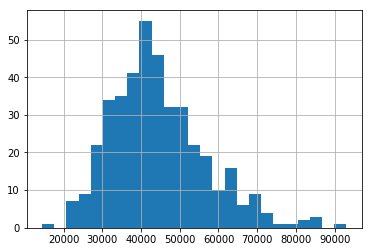

In [4]:
import pandas as pd
pd.options.display.max_columns = None
df2 = df1.loc[df1['成交时间']>'2019-06-01'].sort_values('成交价(元/平)')
df2 = df2.loc[df2['成交时间']<'2019-08-01'].sort_values('成交价(元/平)')
print(df1['成交价(元/平)'].mean(), df1['成交价(元/平)'].median())
df2['成交价(元/平)'].hist(bins = 25)


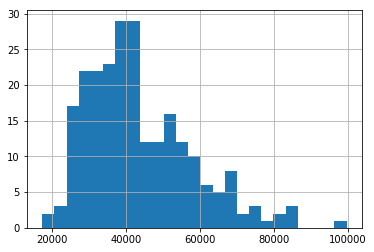

In [5]:
df3 = df1.loc[df1['成交时间']>'2019-08-01'].sort_values('成交价(元/平)')
df3['成交价(元/平)'].hist(bins = 25)

In [8]:
from common import plot
df4 = df3.loc[df3['成交价(元/平)']<30000]
xiaoquList = list(df4['小区'].unique())
print(len(df1), len(df4))
df5 = df1.loc[df1['小区'].isin(xiaoquList)]
print(len(df5))
area = '西湖low'
gp = df5.groupby(['成交时间'])['成交价(元/平)']
res=pd.DataFrame({"volume":gp.size(),"median_price":gp.median(), "mean_price":gp.mean()})
res = res.iloc[:len(res),:]
city = 'default'
MA = True
start_date = None
force = True
keep_all = True
for ma_length in [1,30]:
    title = '%s-%d日均线'%(area, ma_length)
    plot(res, city, title, MA, ma_length, start_date, force, keep_all)
print(xiaoquList)
#画图后发现这些小区在2019年8月之前没有成交。再看具体数据发现是8月之前这些小区属于闸北。

4870 39
434
2013-02-19 00:00:00 2019-09-18 00:00:00


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


2013-02-19 00:00:00 2019-09-18 00:00:00
['泊林漫谷', '人和家园', '中海定山府', '乾成园', '金厦公寓', '三墩景溪北苑', '新星小区', '都市阳光嘉苑', '新世纪花苑', '奥克斯缔逸城', '浪漫和山', '都市水乡水秀苑', '融创瑷骊山', '龙湖水晶郦城', '信鸿花园南区', '都市阳光乐苑', '墩莳家园', '都市阳光和苑', '信鸿花园北区', '桃源春居', '西溪花园流芳苑', '东方苑']


In [ ]:
from common import plot_df
xiaoqu=df.loc[df['小区']=='星纪花苑']
xiaoqu=df.loc[df['小区']=='奥克斯缔逸城']
xiaoqu=df.loc[df['小区']=='康平小区']
xiaoqu=df.loc[df['小区']=='银都一村']

xiaoqu.index = xiaoqu['链家编号']
xiaoqu = xiaoqu.sort_values('成交时间', ascending = False)
xiaoqu.loc[:,['小区','成交时间','成交价(元/平)','售价(万)','户型','建筑面积','建成时间']]

In [ ]:
xiaoqu.iloc[0]['网址']

In [ ]:
xiaoqu['土地年限']